In [25]:
import os
import re
import pickle
import scipy.misc
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
pickle_dir_x = '/Users/Viola/CDS/Rearch/Langone/Vision-Mask-and-Attend/data/data_brain/pickle_files/validation_T1_GD_all_x_no_normalization.pkl'
with open(pickle_dir_x, 'rb') as f:
    data = pickle.load(f)
print(data.shape)

(916, 65536)


In [39]:
pickle_dir_y = '/Users/Viola/CDS/Rearch/Langone/Vision-Mask-and-Attend/data/data_brain/pickle_files/validation_T1_GD_all_y_no_normalization.pkl'
with open(pickle_dir_y, 'rb') as f:
    label = pickle.load(f)
print(label.shape)

(916, 3)


In [40]:
label.sum(axis=0)

array([743, 172,   0])

In [56]:
label[193]

array([0, 1, 0])

In [58]:
label[193].argmax()

1

In [42]:
pickle_dir_id = '/Users/Viola/CDS/Rearch/Langone/Vision-Mask-and-Attend/data/data_brain/pickle_files/validation_T1_GD_all_IDs_no_normalization.pkl'
with open(pickle_dir_id, 'rb') as f:
    ID = pickle.load(f)
print(len(ID))

916


In [43]:
ID[:4]

['dummy', 'TCGA-DU-6405', 'TCGA-DU-6405', 'TCGA-DU-6405']

In [10]:
DATA_PATH = '/Users/Viola/CDS/Rearch/Langone/Vision-Mask-and-Attend/data/data_brain/validation_T1_GD_all_IDs_no_normalization'

for i in range(data.shape[0]):
    scipy.misc.imsave(os.path.join(DATA_PATH, str(i)+'.png'), data[i].reshape((256, 256)))

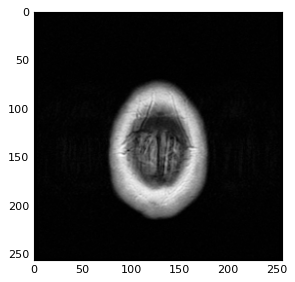

In [11]:
fig = plt.figure()
plt.imshow(data[i].reshape((256, 256)), cmap=cm.Greys_r)
plt.show()

---

In [2]:
%pwd

'/Users/Viola/CDS/Rearch/Langone/Vision-Mask-and-Attend/fine_tuning'

In [20]:
data_path = "/Users/Viola/CDS/Rearch/Langone/Vision-Mask-and-Attend/data/data_brain"

In [21]:
pickle_path = "/Users/Viola/CDS/Rearch/Langone/Vision-Mask-and-Attend/data/data_brain/pickle_files"
os.listdir(pickle_path)

['validation_T1_FLAIR_all_IDs_no_normalization.pkl',
 'validation_T1_GD_all_x_no_normalization.pkl',
 'validation_T1_GD_all_IDs_no_normalization.pkl',
 'validation_T1_all_IDs_no_normalization.pkl',
 'validation_T1_GD_all_y_no_normalization.pkl',
 'validation_T1_FLAIR_all_y_no_normalization.pkl',
 'validation_T1_all_x_no_normalization.pkl',
 'validation_T1_FLAIR_all_x_no_normalization.pkl',
 'validation_T1_all_y_no_normalization.pkl']

In [31]:
def get_indicators(pickle_path):
    indicator_list = []
    for i in os.listdir(pickle_path):
        i = i.split("_") 
        ind_dir = "_".join([i[1], i[2]])
        indicator_list.append(ind_dir)
    return set(indicator_list)

In [33]:
indicators = get_indicators(pickle_path)
print(indicators)

{'T1_all', 'T1_GD', 'T1_FLAIR'}


In [65]:
set_folders = 0  # set to 1 if first time run

In [68]:
if set_folders:
    for indicator in indicators:
        indicator_path = os.path.join(data_path, indicator)
        os.makedirs(indicator_path)

        for sub in ['train', 'val', 'test']:
            sub_path = os.path.join(indicator_path, sub)
            os.makedirs(sub_path)

            for cat in [0, 1, 2]:
                cat_path = os.path.join(sub_path, str(cat))
                os.makedirs(cat_path)

In [36]:
def j(a, b):
    return os.path.join(a, b)

In [69]:
for indicator in indicators:
    
#     for sub in ['train', 'validation', 'testing']:
    for sub in ['validation']:

        for item in os.listdir(pickle_path):
            
            i = item.split("_")
            ind_dir = "_".join([i[1], i[2]])
            sub_dir = i[0]
            
            pickle_dir = os.path.join(pickle_path, item)
            
            if (ind_dir == indicator) and (sub_dir == sub):
                
                if i[3] != 'all': 
                    tag = i[3]
                else:
                    tag = i[4]
                    
                if tag == 'x':
                    with open(pickle_dir, 'rb') as f:
                        data = pickle.load(f)
                elif tag == 'y':
                    with open(pickle_dir, 'rb') as f:
                        label = pickle.load(f)
                else:
                    with open(pickle_dir, 'rb') as f:
                        ID = pickle.load(f)
        
        for i, i_label in enumerate(label):
            
            if sub == 'validation':
                sub = 'val'
            elif sub == 'testing':
                sub = 'test'
                
            cat = str(i_label.argmax())
            
            dst_path = j( j( j(data_path, indicator), sub), cat)
            dst_dir = j(dst_path, ID[i]+'_'+str(i).zfill(4)+'.png')
            
            scipy.misc.imsave(dst_dir, data[i].reshape((256, 256)))

    
    
    
    
#     print(i)
#     if re.findall(".*T1_GD_all_x", i):
#         print(i)